In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import seaborn as sns
sns.set(style="whitegrid")

In [41]:
X=stats.norm(1,0.5)   #1是均值  0.5是偏差

In [42]:
X.mean()

1.0

In [43]:
X.std()

0.5

In [44]:
X.median()

1.0

In [45]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [46]:
X.stats()

(array(1.), array(0.25))

In [47]:
X.pdf(0)

0.10798193302637613

In [48]:
X.pdf(20)

2.194442104e-314

In [49]:
X.pdf([0,1,2])

array([0.10798193, 0.79788456, 0.10798193])

In [50]:
X.cdf([-20,-10,0,2,20])

array([0.00000000e+000, 1.43989244e-107, 2.27501319e-002, 9.77249868e-001,
       1.00000000e+000])

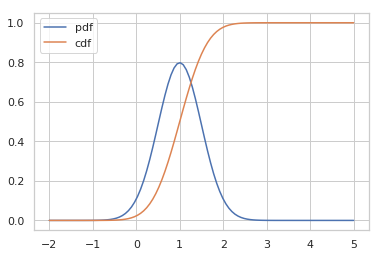

In [51]:
x=np.linspace(-2,5,101)
plt.plot(x,X.pdf(x),label='pdf')
plt.plot(x,X.cdf(x),label='cdf')
plt.legend()

In [29]:
X.interval(0.979)  #置信水平

(-2.3079844749459575, 2.3079844749459593)

In [33]:
X=stats.norm(0,1)

In [35]:
X.cdf(5)

0.9999997133484281

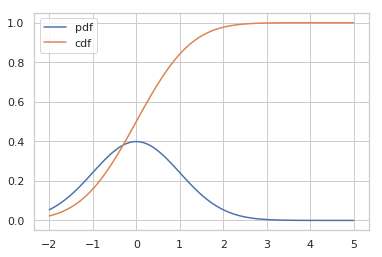

In [36]:
x=np.linspace(-2,5,101)
plt.plot(x,X.pdf(x),label='pdf')
plt.plot(x,X.cdf(x),label='cdf')
plt.legend()

In [52]:
X = stats.poisson(5)    #泊松分布

In [53]:
x=np.arange(10)

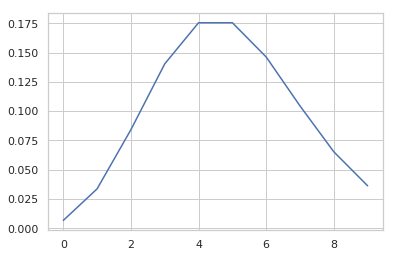

In [55]:
plt.plot(x,X.pmf(x))

In [63]:
X = stats.poisson(3)

In [64]:
x=np.arange(10)

<BarContainer object of 10 artists>

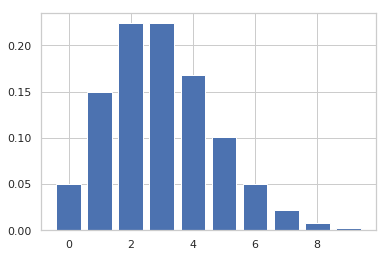

In [65]:
plt.bar(x,X.pmf(x))

<BarContainer object of 100 artists>

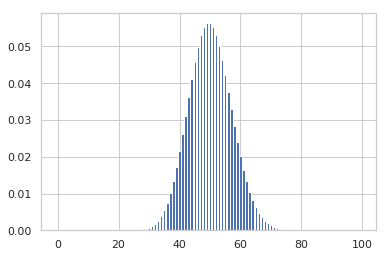

In [66]:
X = stats.poisson(50)
x=np.arange(100)
plt.bar(x,X.pmf(x))

In [67]:
X

In [69]:
X.pmf(40.01)

0.0

In [70]:
X.pmf(40)

0.021499631196827764

<BarContainer object of 20 artists>

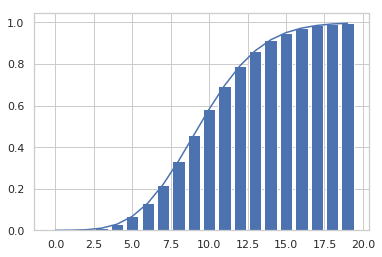

In [80]:
X = stats.poisson(10)
x=np.arange(20)
plt.plot(x,X.cdf(x))
plt.bar(x,X.cdf(x))

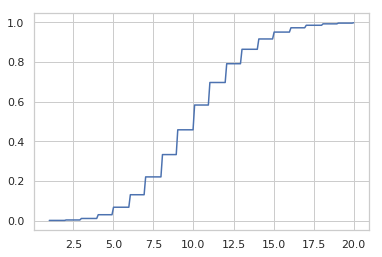

In [89]:
X = stats.poisson(10)
x=np.linspace(1,20,200)
plt.plot(x,X.cdf(x))

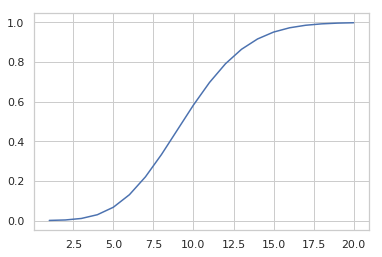

In [90]:
X = stats.poisson(10)
x=np.linspace(1,20,20)
plt.plot(x,X.cdf(x))

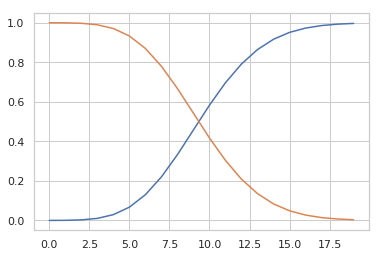

In [86]:
X = stats.poisson(10)
x=np.arange(20)
plt.plot(x,X.cdf(x))
plt.plot(x,X.sf(x))

Text(0, 0.5, 'Poisson dist.')

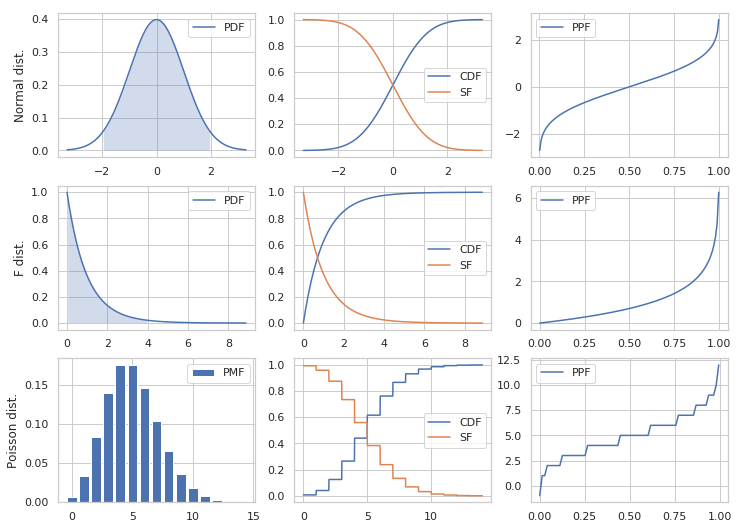

In [88]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))

    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method,instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")

    for ax in axes:
        ax.legend() 
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

In [93]:
X.rvs(100)

array([14, 11,  6, 11,  9,  7,  6,  4, 10,  6,  9,  9, 15, 12, 10, 15, 14,
       10, 10, 10, 12, 12, 11,  6, 14,  9, 10,  7, 15, 11, 13, 11, 10,  8,
        8,  8, 12, 10, 11,  8, 12,  5, 10,  9, 15,  9, 17, 13, 11, 12,  7,
       13,  9,  7, 15, 10,  7,  9,  7,  9, 12, 14,  6,  7,  9,  9, 11,  9,
       16, 10,  5,  7,  9,  8,  7,  8,  8, 10,  7,  9,  9,  7,  5,  6,  7,
        8, 16,  9,  8,  8,  7,  7,  5,  9,  7,  9, 13,  6,  7,  2])

(array([  3.,   2.,   2.,   5.,   8.,  10.,  16.,  27.,  37.,  46.,  58.,
         73., 122., 165., 174., 205., 265., 337., 361., 424., 478., 536.,
        545., 592., 582., 542., 555., 536., 493., 464., 431., 405., 322.,
        235., 230., 190., 143., 110.,  74.,  62.,  36.,  32.,  25.,  15.,
          9.,   7.,   4.,   3.,   1.,   3.]),
 array([-3.62676172, -3.48129128, -3.33582083, -3.19035039, -3.04487994,
        -2.8994095 , -2.75393905, -2.60846861, -2.46299816, -2.31752771,
        -2.17205727, -2.02658682, -1.88111638, -1.73564593, -1.59017549,
        -1.44470504, -1.2992346 , -1.15376415, -1.00829371, -0.86282326,
        -0.71735281, -0.57188237, -0.42641192, -0.28094148, -0.13547103,
         0.00999941,  0.15546986,  0.3009403 ,  0.44641075,  0.59188119,
         0.73735164,  0.88282208,  1.02829253,  1.17376298,  1.31923342,
         1.46470387,  1.61017431,  1.75564476,  1.9011152 ,  2.04658565,
         2.19205609,  2.33752654,  2.48299698,  2.62846743,  2.77393787,
 

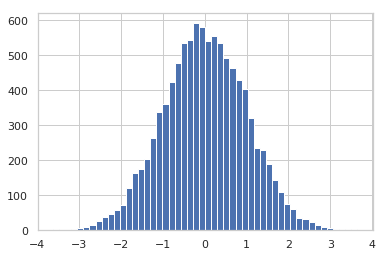

In [114]:
e=np.random.randn(10000)
plt.hist(e,50)

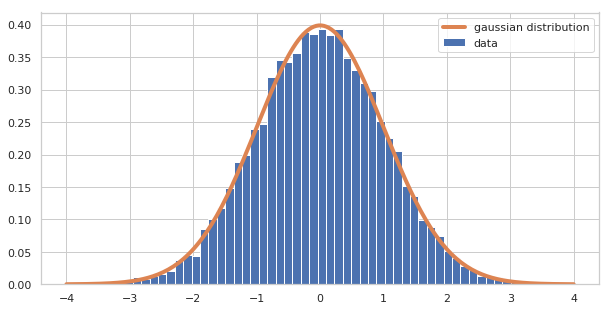

In [128]:
X=stats.norm(0,1)
b=X.rvs(10000)
fig=plt.figure(figsize=(10,5))
plt.hist(b,50,density=1,label='data')
x=np.linspace(-4,4,200)
X=stats.norm(0,1)
plt.plot(x,X.pdf(x),lw=4,label='gaussian distribution')
plt.legend()

In [117]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
Y = stats.chi2(df=df, loc=loc, scale=scale)

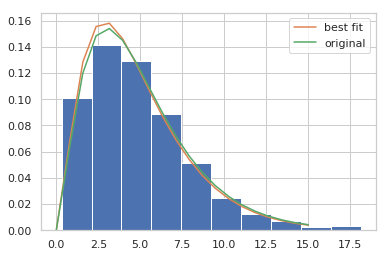

In [121]:
x=np.linspace(0,15,20)
plt.hist(X_samples,density=1)
plt.plot(x,Y.pdf(x),label='best fit')
plt.plot(x,X.pdf(x),label='original')
plt.legend()

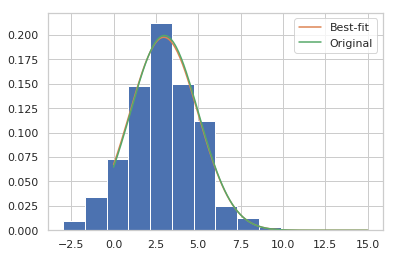

In [122]:
X = stats.norm(3,2)
X_samples = X.rvs(500)
loc, scale = stats.norm.fit(X_samples)
Y = stats.norm(loc=loc, scale=scale)

x = np.linspace(0,15,200)
plt.hist(X_samples,density=1)
plt.plot(x, Y.pdf(x),label='Best-fit')
plt.plot(x, X.pdf(x),label='Original')
plt.legend()